# IMPORTING_LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
from scipy.stats import uniform, randint

# EXTRACTING_DATA

In [3]:
train_df = pd.read_csv("hacktrain.csv")
test_df = pd.read_csv("hacktest.csv")

In [4]:
train_df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [6]:
train_df.isna().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

# EDA

In [7]:
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print("\nTrain Sample:\n", train_df.head())

Train Shape: (8000, 30)
Test Shape: (2845, 29)

Train Sample:
    Unnamed: 0  ID  class  20150720_N  20150602_N  20150517_N  20150501_N  \
0           0   1  water    637.5950     658.668   -1882.030    -1924.36   
1           1   2  water    634.2400     593.705   -1625.790    -1672.32   
2           3   4  water     58.0174   -1599.160         NaN    -1052.63   
3           4   5  water     72.5180         NaN     380.436    -1256.93   
4           7   8  water   1136.4400         NaN         NaN     1647.83   

   20150415_N  20150330_N  20150314_N  ...  20140610_N  20140525_N  \
0     997.904   -1739.990     630.087  ...         NaN   -1043.160   
1     914.198    -692.386     707.626  ...         NaN    -933.934   
2         NaN   -1564.630         NaN  ...    -1025.88     368.622   
3     515.805   -1413.180    -802.942  ...    -1813.95     155.624   
4    1935.800         NaN    2158.980  ...     1535.00    1959.430   

   20140509_N  20140423_N  20140407_N  20140322_N  20140218

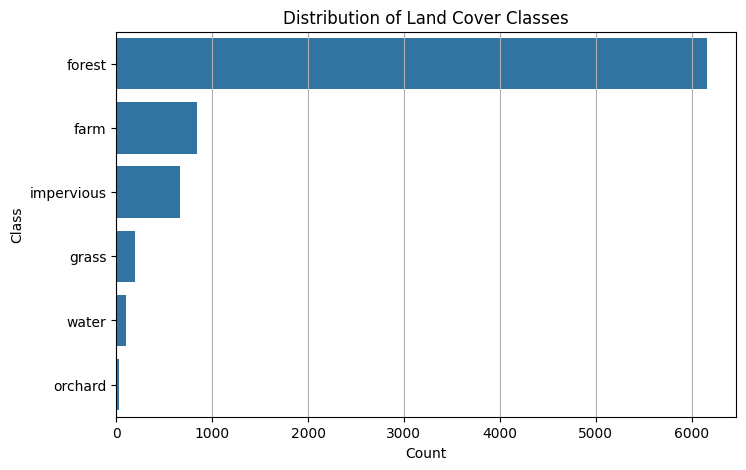

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, y="class", order=train_df["class"].value_counts().index)
plt.title("Distribution of Land Cover Classes")
plt.xlabel("Count")
plt.ylabel("Class")
plt.grid(axis='x')
plt.show()

Forest dominates (~6000+ samples)

Orchard, Grass, Water, and Farm are minority classes

Class imbalance will affect model training → consider class weighting



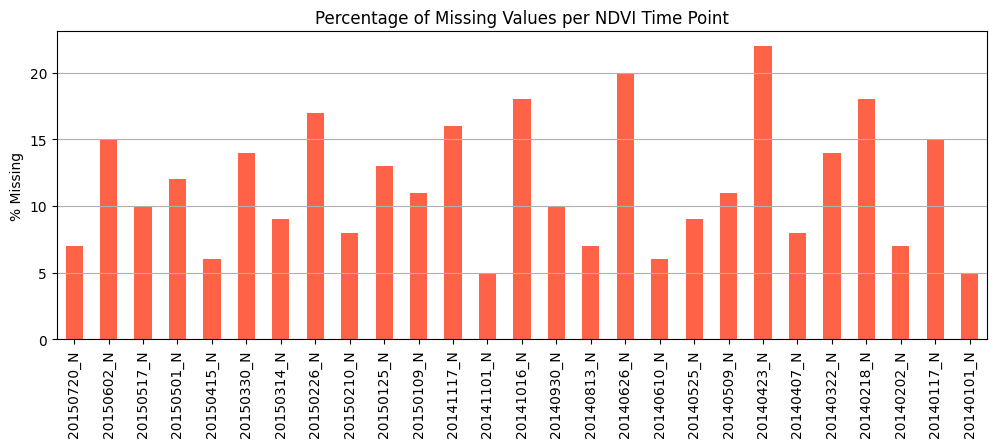

In [9]:
ndvi_cols = [col for col in train_df.columns if '_N' in col]
missing_percent = train_df[ndvi_cols].isnull().mean() * 100

plt.figure(figsize=(12, 4))
missing_percent.plot(kind="bar", color="tomato")
plt.title("Percentage of Missing Values per NDVI Time Point")
plt.ylabel("% Missing")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Some dates have >10% missing values (likely due to cloud cover)

Use interpolation + imputation to fill missing NDVI values



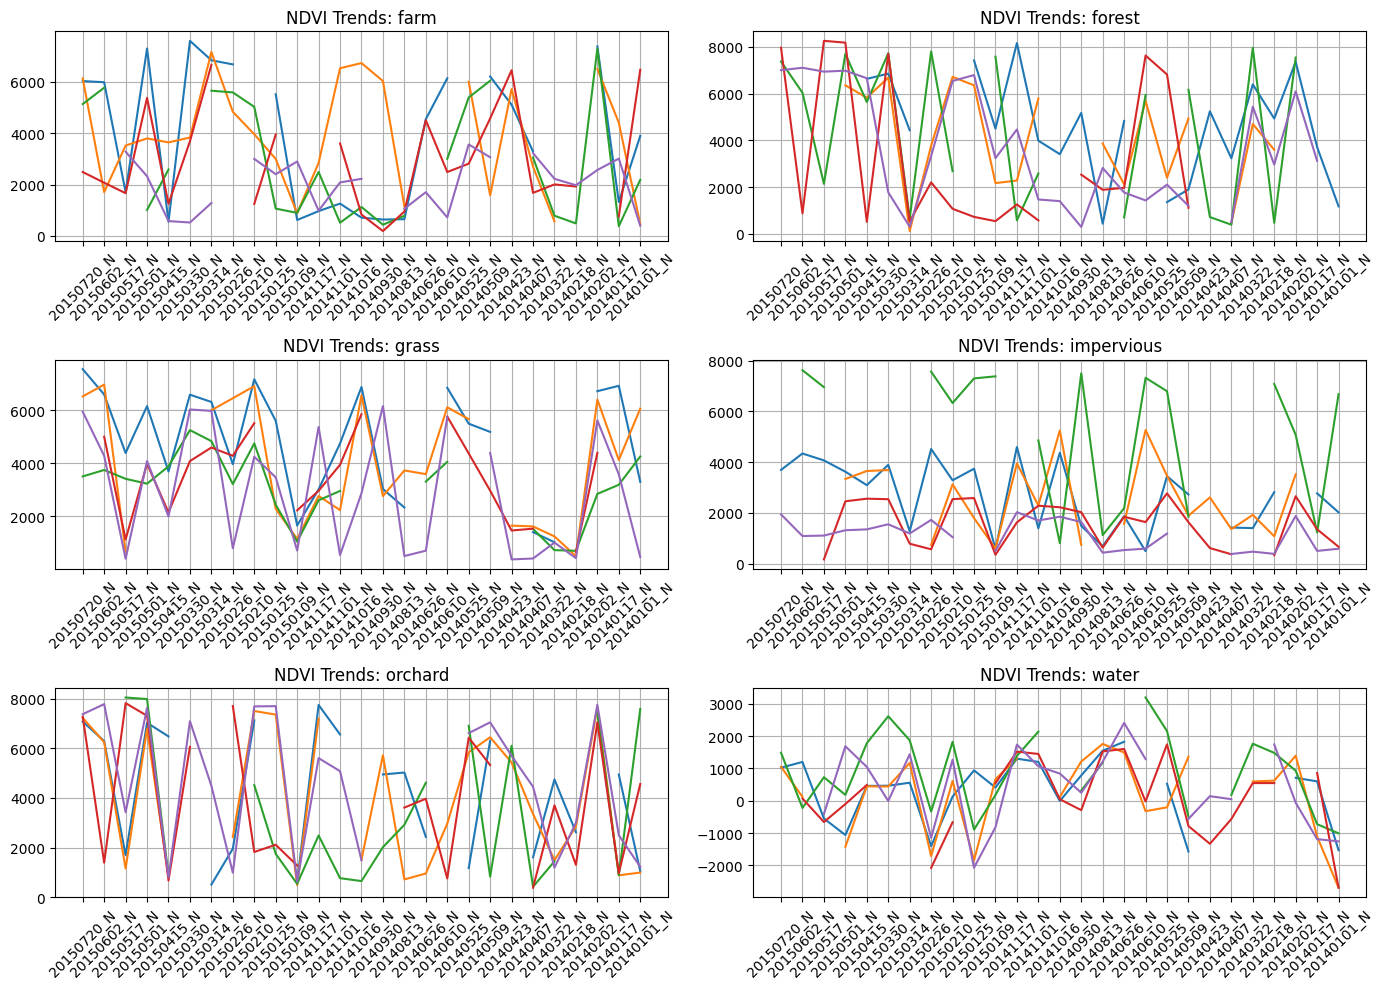

In [10]:
sample_df = train_df.groupby("class").apply(lambda x: x.sample(min(5, len(x)))).reset_index(drop=True)

plt.figure(figsize=(14, 10))
for label in sample_df['class'].unique():
    plt.subplot(3, 2, list(sample_df['class'].unique()).index(label)+1)
    for i in range(5):
        plt.plot(ndvi_cols, sample_df[sample_df['class'] == label][ndvi_cols].iloc[i], label=f"{label}-{i}")
    plt.xticks(rotation=45)
    plt.title(f"NDVI Trends: {label}")
    plt.grid(True)
plt.tight_layout()
plt.show()

Forest shows strong seasonal NDVI pattern (high peak)

Water stays flat and low NDVI

Impervious also flat but slightly higher than water

Farm and Grass show moderate NDVI growth

Orchard has some peak but often confused with forest



In [11]:
summary_stats = train_df.groupby("class")[ndvi_cols].agg(['mean', 'std', 'min', 'max'])
summary_stats = summary_stats.swaplevel(axis=1).sort_index(axis=1)
summary_stats.head()


max                                                         \
           20140101_N 20140117_N 20140202_N 20140218_N 20140322_N 20140407_N   
class                                                                          
farm          8062.99    7488.70    8193.09    7159.27    7652.19    7530.71   
forest        8502.02    8418.23    8410.33    8247.63    8216.70    8078.08   
grass         8281.98    7722.56    8246.08    5692.16    6084.25    6157.23   
impervious    7396.01    7384.61    7578.42    7365.31    5330.21    6788.53   
orchard       8022.44    6056.47    8363.78    6781.29    6422.24    7330.99   

                                                        ...          std  \
           20140423_N 20140509_N 20140525_N 20140610_N  ...   20150125_N   
class                                                   ...                
farm          7298.23    7913.23    7196.89    8047.54  ...  2262.895952   
forest        7762.98    8445.41    7981.82    8489.97  ...  2552.387081   
grass         6594.47    7841.33    6735.14    7708.59  ...  1693.605864   
impervious    5617.82    7497.35    6836.19    7852.29  ...  1735.339466   
orchard       7315.40    7757.58    7273.76    7673.15  ...  2316.730787   

                                                                             \
             20150210_N   20150226_N   20150314_N   20150330_N   20150415_N   
class                                                                         
farm        2242.487417  2365.846879  2205.783599  1862.077309  1850.130198   
forest      2839.384119  2528.460530  2492.240695  2569.774732  2913.147705   
grass       1799.293807  1980.843806  1538.631873  1572.707590  1774.184624   
impervious  1619.907305  1606.832937  1371.181434  1572.470739  1297.669636   
orchard     2503.106113  2744.074279  2003.028964  2327.300699  1769.397046   

                                                                
             20150501_N   20150517_N   20150602_N   20150720_N  
class                                                           
farm        1672.185442  1960.732739  1841.886774  1819.397850  
forest      2378.778273  2860.983826  2766.371286  2023.812666  
grass       1724.578713  1971.964831  1590.940243  1312.981473  
impervious  1466.258007  1651.691335  1749.661182  1849.028912  
orchard     1258.681881  2880.378046  2783.991865   932.574124  

[5 rows x 108 columns]

Spot how standard deviation of NDVI varies across classes

Confirm that forest has high mean/max NDVI

Use in feature engineering (max-min, seasonal mean, etc.)



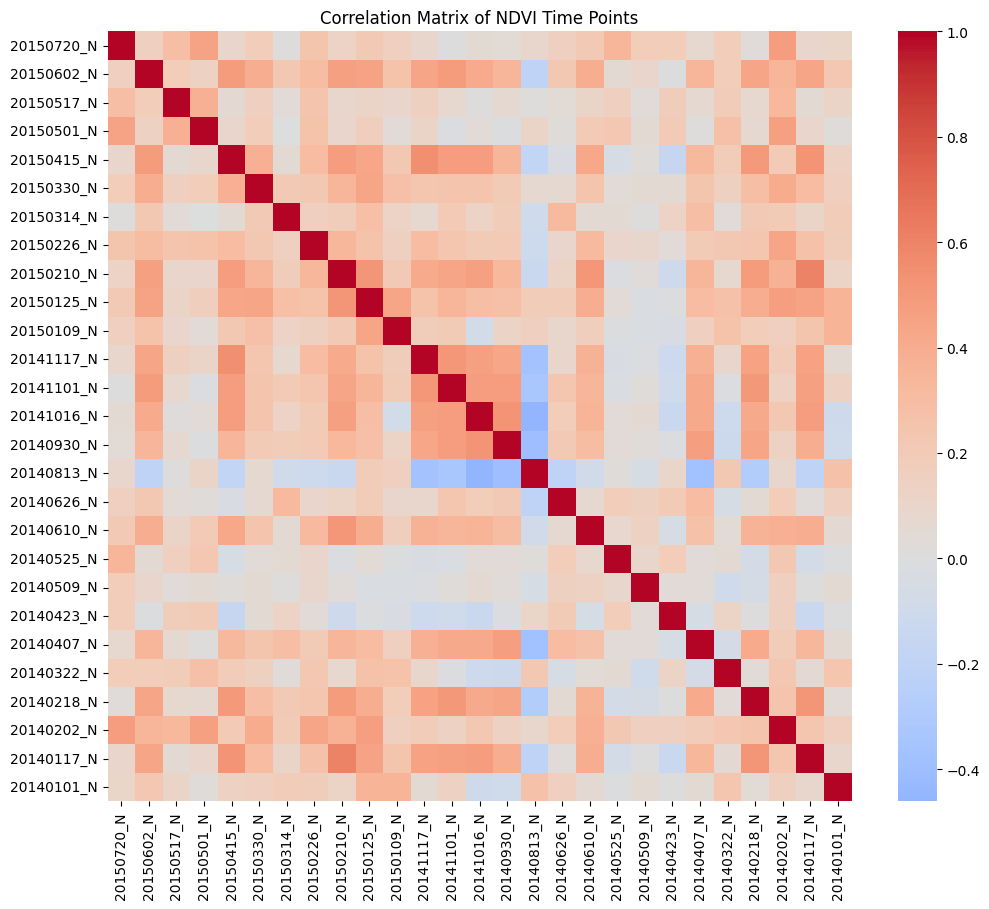

In [12]:
ndvi_corr = train_df[ndvi_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(ndvi_corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of NDVI Time Points")
plt.show()

Strong positive correlation between adjacent dates

Indicates temporal continuity in vegetation cycles

You can reduce dimensionality via PCA if needed

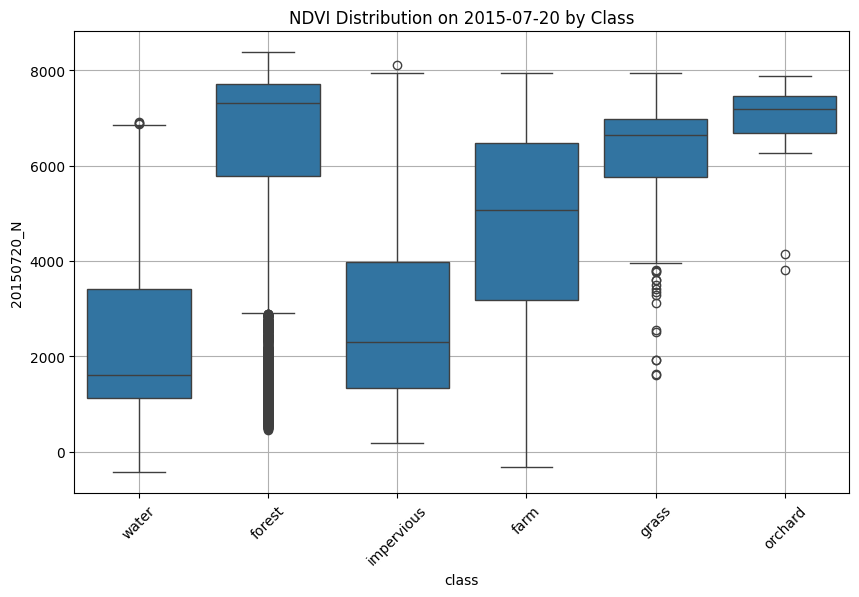

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="class", y="20150720_N", data=train_df)
plt.xticks(rotation=45)
plt.title("NDVI Distribution on 2015-07-20 by Class")
plt.grid()
plt.show()

# feature engg

In [14]:
ndvi_cols = [col for col in train_df.columns if "_N" in col]

In [15]:
le = LabelEncoder()
train_df['class_encoded'] = le.fit_transform(train_df['class'])

In [16]:
def impute_ndvi(df):
    ndvi = df[ndvi_cols]
    ndvi_interp = ndvi.interpolate(axis=1, limit_direction='both')
    imputer = SimpleImputer(strategy="mean")
    ndvi_clean = pd.DataFrame(imputer.fit_transform(ndvi_interp), columns=ndvi_cols)
    return ndvi_clean

X_train_ndvi = impute_ndvi(train_df)
X_test_ndvi = impute_ndvi(test_df)

In [17]:
def generate_features(ndvi_df):
    feats = pd.DataFrame()
    feats["mean"] = ndvi_df.mean(axis=1)
    feats["std"] = ndvi_df.std(axis=1)
    feats["min"] = ndvi_df.min(axis=1)
    feats["max"] = ndvi_df.max(axis=1)
    feats["range"] = feats["max"] - feats["min"]
    feats["slope"] = ndvi_df.apply(lambda row: np.polyfit(range(len(row)), row, 1)[0], axis=1)
    feats["early_season"] = ndvi_df.iloc[:, :9].mean(axis=1)
    feats["mid_season"] = ndvi_df.iloc[:, 9:18].mean(axis=1)
    feats["late_season"] = ndvi_df.iloc[:, 18:].mean(axis=1)
    feats["green_up"] = feats["mid_season"] - feats["early_season"]
    feats["senescence"] = feats["late_season"] - feats["mid_season"]
    return pd.concat([ndvi_df.reset_index(drop=True), feats.reset_index(drop=True)], axis=1)
X_feats = generate_features(X_train_ndvi)
X_test_feats = generate_features(X_test_ndvi)
y = train_df['class_encoded']


In [18]:
def get_highly_correlated_columns(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    correlated_pairs = [
        (column, idx, corr_matrix.loc[column, idx])
        for column in upper.columns
        for idx in upper.index
        if pd.notnull(upper.loc[idx, column]) and upper.loc[idx, column] > threshold
    ]

    correlated_pairs = sorted(correlated_pairs, key=lambda x: -x[2])
    return correlated_pairs

correlated_columns = get_highly_correlated_columns(X_feats, threshold=0.90)

for col1, col2, corr in correlated_columns:
    print(f"{col1} ⬌ {col2} | Correlation: {corr:.4f}")


range ⬌ max | Correlation: 0.9778
range ⬌ std | Correlation: 0.9192
early_season ⬌ mean | Correlation: 0.9107
max ⬌ std | Correlation: 0.9047


In [19]:
X_feats.drop(["min","max"],axis=1,inplace=True)
X_test_feats.drop(["min","max"],axis=1,inplace=True)

In [20]:
X_feats.columns

Index(['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
       '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
       '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N',
       '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
       '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
       '20140117_N', '20140101_N', 'mean', 'std', 'range', 'slope',
       'early_season', 'mid_season', 'late_season', 'green_up', 'senescence'],
      dtype='object')

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_feats)
X_test_scaled = scaler.transform(X_test_feats)


In [22]:
X_noisy_train, X_val_noisy, y_noisy_train, y_val_noisy = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# MODEL_TRAINING

In [23]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_noisy_train, y_noisy_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [24]:
y_pred_noisy = model.predict(X_val_noisy)
print("\n Public Leaderboard Simulation (Noisy Validation):")
print("Accuracy:", accuracy_score(y_val_noisy, y_pred_noisy))
print(classification_report(y_val_noisy, y_pred_noisy, target_names=le.classes_))



 Public Leaderboard Simulation (Noisy Validation):
Accuracy: 0.901875
              precision    recall  f1-score   support

        farm       0.70      0.55      0.62       168
      forest       0.93      0.98      0.95      1232
       grass       0.83      0.51      0.63        39
  impervious       0.83      0.85      0.84       134
     orchard       1.00      0.17      0.29         6
       water       0.87      0.62      0.72        21

    accuracy                           0.90      1600
   macro avg       0.86      0.61      0.68      1600
weighted avg       0.90      0.90      0.90      1600



# FINE_TUNING

In [26]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "penalty": ["l2"],
    "class_weight": ["balanced", None],
    "max_iter": [1000]
}

base_model = LogisticRegression(multi_class='multinomial')
grid_search = GridSearchCV(
    base_model,
    param_grid,
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_noisy_train, y_noisy_train)

best_model = grid_search.best_estimator_

print("\n Best Params Found:")
print(grid_search.best_params_)

y_pred_noisy = best_model.predict(X_val_noisy)

print("\n Public Leaderboard Simulation (Noisy Validation):")
print("Accuracy:", accuracy_score(y_val_noisy, y_pred_noisy))
print(classification_report(y_val_noisy, y_pred_noisy, target_names=le.classes_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Params Found:
{'C': 1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

 Public Leaderboard Simulation (Noisy Validation):
Accuracy: 0.901875
              precision    recall  f1-score   support

        farm       0.70      0.55      0.62       168
      forest       0.93      0.98      0.95      1232
       grass       0.83      0.51      0.63        39
  impervious       0.83      0.85      0.84       134
     orchard       1.00      0.17      0.29         6
       water       0.87      0.62      0.72        21

    accuracy                           0.90      1600
   macro avg       0.86      0.61      0.68      1600
weighted avg       0.90      0.90      0.90      1600



# SUBMISSION

In [27]:
y_test_pred = best_model.predict(X_test_scaled)
y_test_labels = le.inverse_transform(y_test_pred)

submission_df = pd.DataFrame({
    "ID": test_df["ID"],  
    "class": y_test_labels
})
submission_df.to_csv("submission1.csv", index=False)
